# 8. Orthogonality

1. [Projection](#1.-Projection)
1. [Rank-k Approximation](#2.-Rank-k-Approximation)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Projection $a(a^Ta)^{-1}a^Tb$

The vector $b$ can be projected onto the span of vector $a$. 

- $b=z+w$
- Where $z = \chi a$
- We choose $w \perp a$, so $a^Tw=0$
- That gives us $a^T(b-z)=0$
- Equals $a^T(b-\chi a) = a^Tb - \chi a^Ta=0$
- What we get is something that looks like the normal equation, but for only one column $a^Ta\chi=a^Tb$
- We can solve $\chi=a^Tb/a^Ta=(a^Ta)^{-1}a^Tb$
- Finally, we know how to scale $a$ so that it reaches the point where $b$ would be projected: $z = a^Tb/a^Taa = aa^Tb/a^Ta=a(a^Ta)^{-1}a^Tb$

In [2]:
a, b = np.matrix("2.5; 1.5"), np.matrix("5; -1")

def projection(A):
    """Returns projection matrix that can be multiplied with any b
    to get the projection of b onto C(A)"""
    return A @ (A.T @ A).I @ A.T

z = projection(a) @ b
print(z)

[[3.23529412]
 [1.94117647]]


Let's plot the following:
- $a$, the vector that has to be scaled to the projection of $b$
- $b$ which consists of $z$ and $w$

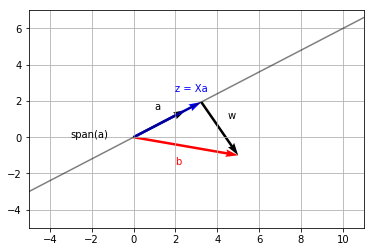

In [3]:
a, b, w, z = [np.array([x, y]) 
              for x, y 
              in [[2.5, 1.5], 
                  [5, -1], 
                  [1.76470588, -2.94117647],
                  [3.23529412, 1.94117647]]]

span_a = ((x, (lambda x: x * a[1]/a[0])(x)) for x in np.linspace(-5, 11, 2))

plt.quiver([0], [0], *zip(*[a, b, z]), angles = 'xy', scale_units = 'xy', scale = 1, color=['black', 'r', 'b'])
plt.quiver(*zip(z), *zip(w), angles = 'xy', scale_units = 'xy', scale = 1)
plt.plot(*zip(*span_a), color="black", alpha=0.5)
plt.text(2, -1.5, "b", color="r")
plt.text(2, 2.5, "z = Xa", color="b")
plt.text(-3, 0, "span(a)")
plt.text(4.5, 1, "w")
plt.text(1, 1.5, "a")

plt.xlim(-5, 11)
plt.ylim(-5, 7)
plt.grid()

Given vectors $a, b \in \mathbb{R}^m$, then:
- $a(a^Ta)^{-1}a^T$ is the matrix that projects any $b$ onto the $span(\{a\})=\mathcal{C}((a))$.
- $I-a(a^Ta)^{-1}a^T$ is the matrix that projects any $b$ onto the $span(\{a\})^\perp=\mathcal{N}((a^T))$.

Let $a=
\begin{pmatrix}
1 \\
0
\end{pmatrix}
$ and $p_a(x), P_a^\perp(x)$ be the projection of $x$ onto $span(\{a\}), span(\{a\})^\perp$, respectively.

What is the projections of $x = 
\begin{pmatrix}
4 \\
2
\end{pmatrix}
$?

In [4]:
# We've already defined the projection(A) function

def projection_perp(A):
    """Returns projection matrix that can be multiplied with any b
    to get the projection of b onto N(A^T)"""
    return np.identity(len(A)) - projection(A)

In [6]:
x = np.matrix("4; 2")
a = np.matrix("1; 0")

print(projection(a) @ x, "<4, 2> onto C((a))")
print(projection_perp(a) @ x, "<4, 2> onto N((a^T))")

[[4.]
 [0.]] <4, 2> onto C((a))
[[0.]
 [2.]] <4, 2> onto N((a^T))


Let $A,b=
\begin{pmatrix}
1 & 1 \\
1 & -1\\
-2 & 4
\end{pmatrix}
$$,
\begin{pmatrix}
1 \\
2 \\
7
\end{pmatrix}
$, then the projection of $b$ onto $\mathcal{C}(A)$ and $\mathcal{N}(A^T)$ is:

In [7]:
A = np.matrix("1 1; 1 -1; -2 4")
b = np.matrix("1; 2; 7")

print(projection(A) @ b, "<1, 2, 7> onto C(A)")
print(projection_perp(A) @ b, "<1, 2, 7> onto N(A^T)")

[[ 2.09090909]
 [-1.27272727]
 [ 5.90909091]] <1, 2, 7> onto C(A)
[[-1.09090909]
 [ 3.27272727]
 [ 1.09090909]] <1, 2, 7> onto N(A^T)


We can verify the answer by doing the calculation manually:

$$A(A^TA)^{-1}A^Tb$$

- $A^TA =
\begin{pmatrix}
1 & 1\\
1 & -1\\
-2 & 4
\end{pmatrix}^T
$ $
\begin{pmatrix}
1 & 1\\
1 & -1\\
-2 & 4
\end{pmatrix}
$ $=
\begin{pmatrix}
6 & -8 \\
-8 & 18
\end{pmatrix}
$
- $(A^TA)^{-1} = \frac{1}{(6)(18)-(-8)(-8)}
\begin{pmatrix}
18 & 8 \\
8 & 6
\end{pmatrix}
$ $=\frac{1}{44}
\begin{pmatrix}
18 & 8 \\
8 & 6
\end{pmatrix}
$
- $A^Tb = 
\begin{pmatrix}
1 & 1\\
1 & -1\\
-2 & 4
\end{pmatrix}^T
$ $
\begin{pmatrix}
1 \\
2 \\
7
\end{pmatrix}
$ $=
\begin{pmatrix}
-11 \\
27
\end{pmatrix}
$
- $(A^TA)^{-1}A^Tb = \frac{1}{44}
\begin{pmatrix}
18 & 8 \\
8 & 6
\end{pmatrix}
$ $
\begin{pmatrix}
-11 \\
27
\end{pmatrix}
$ $= \frac{1}{44}
\begin{pmatrix}
18 \\
74
\end{pmatrix}
$
- $A(A^TA)^{-1}A^Tb =
\frac{1}{44}
\begin{pmatrix}
1 & 1\\
1 & -1\\
-2 & 4
\end{pmatrix}
$ $
\begin{pmatrix}
18\\
74
\end{pmatrix}
$ $ = \frac{1}{44}
\begin{pmatrix}
92 \\
-56 \\
260
\end{pmatrix}
$

## 2. Rank-k Approximation

Low-rank approximation is a minimization problem, in which the cost function measures the fit between a given matrix (the data) and an approximating matrix (the optimization variable). It is used in mathematical modelling and data compression.

Given $a \in \mathbb{R}^m$ and $B\in \mathbb{R}^{m\times n}$, then:
- $B \approx ay^T$, where $y=(a^Ta)^{-1}B^Ta$
- Each column of $ay^T$ equals the projection of the corresponding column of $B$ onto $span(a)$
- This is known as the rank-1 approximation of $B$
- It is not necessarily the best rank-1 approximation